In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [2]:
WA_facility_meta = "http://data.wa.aemo.com.au/public/infographic/facility-meta.csv"
WA_facility_all_month = "http://data.wa.aemo.com.au/public/infographic/facility-months-alltime.csv"

In [3]:
Facility_meta = pd.read_csv(WA_facility_meta)
Facility_meta = Facility_meta[['PARTICIPANT_CODE', 'FACILITY_CODE', 'DISPLAY_NAME', 'FACILITY_TYPE', 'PRIMARY_FUEL', 'ALTERNATE_FUEL', 'GENERATION_TYPE']]

In [4]:
Facility_all_month = pd.read_csv(WA_facility_all_month)

In [5]:
df_join =  Facility_all_month.merge(Facility_meta, on=['FACILITY_CODE','PARTICIPANT_CODE'], how='left')
df_join.head()

,PERIOD,PARTICIPANT_CODE,FACILITY_CODE,ACTUAL_MW,PCT_ALT_FUEL,PEAK_MW,OUTAGE_MW,PEAK_OUTAGE_MW,POTENTIAL_MWH,INTERVALS_GENERATING,TOTAL_INTERVALS,PCT_GENERATING,AS_AT,DISPLAY_NAME,FACILITY_TYPE,PRIMARY_FUEL,ALTERNATE_FUEL,GENERATION_TYPE
0,2006-09-01 00:00:00,ALBGRAS,ALBANY_WF1,5246.346,0.0,22.008,NaN,NaN,5202.0,544,1440,0.378,2022-11-02 02:00:00,Albany Wind Farm,Wind,Wind,NaN,Base
1,2006-09-01 00:00:00,ALCOA,ALCOA_WGP,6021.886,0.0,20.284,NaN,NaN,NaN,525,1440,0.365,NaN,Alcoa Wagerup,Gas,Gas,NaN,Base
2,2006-09-01 00:00:00,ALINTA,ALINTA_PNJ_U1,73967.204,0.0,142.050,NaN,NaN,92880.0,544,1440,0.378,NaN,Pinjarra 1,Gas,Gas,NaN,Base
3,2006-09-01 00:00:00,ALINTA,ALINTA_WWF,18003.914,0.0,84.068,NaN,NaN,29304.0,518,1440,0.360,NaN,Walkaway Wind Farm,Wind,Wind,NaN,Base
4,2006-09-01 00:00:00,PERTHNRGY,ATLAS,NaN,0.0,NaN,NaN,NaN,720.0,0,1440,0.000,NaN,Atlas,Landfill Gas,Landfill Gas,NaN,Base


In [6]:
df_distillate_ = df_join[df_join.FACILITY_TYPE == 'Dual (Gas / Distillate)']
df_distillate_['ACTUAL_MW'] = df_distillate_['ACTUAL_MW']*df_distillate_['PCT_ALT_FUEL']
df_distillate_['PRIMARY_FUEL'] = df_distillate_['ALTERNATE_FUEL']
df_distillate_.head()

,PERIOD,PARTICIPANT_CODE,FACILITY_CODE,ACTUAL_MW,PCT_ALT_FUEL,PEAK_MW,OUTAGE_MW,PEAK_OUTAGE_MW,POTENTIAL_MWH,INTERVALS_GENERATING,TOTAL_INTERVALS,PCT_GENERATING,AS_AT,DISPLAY_NAME,FACILITY_TYPE,PRIMARY_FUEL,ALTERNATE_FUEL,GENERATION_TYPE
10,2006-09-01 00:00:00,WPGENER,KEMERTON_GT11,5313.839242,0.367,144.982,29532.0,154.0,86400.0,142,1440,0.099,NaN,Kemerton 1,Dual (Gas / Distillate),Distillate,Distillate,Peaking
11,2006-09-01 00:00:00,WPGENER,KEMERTON_GT12,8441.993836,0.367,142.898,10005.0,145.0,86400.0,203,1440,0.141,NaN,Kemerton 2,Dual (Gas / Distillate),Distillate,Distillate,Peaking
17,2006-09-01 00:00:00,WPGENER,PINJAR_GT1,1981.982032,0.367,36.802,NaN,NaN,23760.0,269,1440,0.187,NaN,Pinjar Gas Turbine 1,Dual (Gas / Distillate),Distillate,Distillate,Peaking
20,2006-09-01 00:00:00,WPGENER,PINJAR_GT2,1569.109234,0.367,36.024,4278.0,37.2,23760.0,235,1440,0.163,NaN,Pinjar Gas Turbine 2,Dual (Gas / Distillate),Distillate,Distillate,Peaking
21,2006-09-01 00:00:00,WPGENER,PINJAR_GT3,46.904802,0.367,31.558,44362.4,38.2,25200.0,8,1440,0.006,NaN,Pinjar Gas Turbine 3,Dual (Gas / Distillate),Distillate,Distillate,Peaking


In [7]:
df_gas = df_join[df_join.FACILITY_TYPE == 'Dual (Gas / Distillate)']
df_gas['ACTUAL_MW'] = df_gas['ACTUAL_MW']*(1-df_gas.PCT_ALT_FUEL)
df_gas

,PERIOD,PARTICIPANT_CODE,FACILITY_CODE,ACTUAL_MW,PCT_ALT_FUEL,PEAK_MW,OUTAGE_MW,PEAK_OUTAGE_MW,POTENTIAL_MWH,INTERVALS_GENERATING,TOTAL_INTERVALS,PCT_GENERATING,AS_AT,DISPLAY_NAME,FACILITY_TYPE,PRIMARY_FUEL,ALTERNATE_FUEL,GENERATION_TYPE
10,2006-09-01 00:00:00,WPGENER,KEMERTON_GT11,9165.286758,0.367,144.982,29532.000,154.000,86400.000,142,1440,0.099,NaN,Kemerton 1,Dual (Gas / Distillate),Gas,Distillate,Peaking
11,2006-09-01 00:00:00,WPGENER,KEMERTON_GT12,14560.714164,0.367,142.898,10005.000,145.000,86400.000,203,1440,0.141,NaN,Kemerton 2,Dual (Gas / Distillate),Gas,Distillate,Peaking
17,2006-09-01 00:00:00,WPGENER,PINJAR_GT1,3418.513968,0.367,36.802,NaN,NaN,23760.000,269,1440,0.187,NaN,Pinjar Gas Turbine 1,Dual (Gas / Distillate),Gas,Distillate,Peaking
20,2006-09-01 00:00:00,WPGENER,PINJAR_GT2,2706.392766,0.367,36.024,4278.000,37.200,23760.000,235,1440,0.163,NaN,Pinjar Gas Turbine 2,Dual (Gas / Distillate),Gas,Distillate,Peaking
21,2006-09-01 00:00:00,WPGENER,PINJAR_GT3,80.901198,0.367,31.558,44362.400,38.200,25200.000,8,1440,0.006,NaN,Pinjar Gas Turbine 3,Dual (Gas / Distillate),Gas,Distillate,Peaking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2022-10-01 00:00:00,WPGENER,PINJAR_GT3,11375.980000,0.000,39.176,2516.000,37.000,27528.000,889,1488,0.597,NaN,Pinjar Gas Turbine 3,Dual (Gas / Distillate),Gas,Distillate,Peaking
10856,2022-10-01 00:00:00,WPGENER,PINJAR_GT4,13398.874000,0.000,37.380,NaN,NaN,27528.000,1049,1488,0.705,NaN,Pinjar Gas Turbine 4,Dual (Gas / Distillate),Gas,Distillate,Peaking
10857,2022-10-01 00:00:00,WPGENER,PINJAR_GT5,17164.368000,0.000,39.510,1611.927,37.000,27528.000,1288,1488,0.866,NaN,Pinjar Gas Turbine 5,Dual (Gas / Distillate),Gas,Distillate,Peaking
10858,2022-10-01 00:00:00,WPGENER,PINJAR_GT7,12317.446000,0.000,35.714,259.000,37.000,27528.000,898,1488,0.603,NaN,Pinjar Gas Turbine 7,Dual (Gas / Distillate),Gas,Distillate,Peaking


In [8]:
df_join = df_join[df_join.FACILITY_TYPE != 'Dual (Gas / Distillate)']
df_join = pd.concat([df_join, df_distillate_, df_gas])
df_join['GWH'] = df_join.ACTUAL_MW/(2*1000)

In [9]:
df_join.index = pd.DatetimeIndex(df_join['PERIOD'])
df_join.drop('PERIOD', axis=1, inplace=True)
df_join

,PARTICIPANT_CODE,FACILITY_CODE,ACTUAL_MW,PCT_ALT_FUEL,PEAK_MW,OUTAGE_MW,PEAK_OUTAGE_MW,POTENTIAL_MWH,INTERVALS_GENERATING,TOTAL_INTERVALS,PCT_GENERATING,AS_AT,DISPLAY_NAME,FACILITY_TYPE,PRIMARY_FUEL,ALTERNATE_FUEL,GENERATION_TYPE,GWH
PERIOD,,,,,,,,,,,,,,,,,,
2006-09-01,ALBGRAS,ALBANY_WF1,5246.346000,0.000,22.008,NaN,NaN,5202.000,544,1440,0.378,2022-11-02 02:00:00,Albany Wind Farm,Wind,Wind,NaN,Base,2.623173
2006-09-01,ALCOA,ALCOA_WGP,6021.886000,0.000,20.284,NaN,NaN,NaN,525,1440,0.365,NaN,Alcoa Wagerup,Gas,Gas,NaN,Base,3.010943
2006-09-01,ALINTA,ALINTA_PNJ_U1,73967.204000,0.000,142.050,NaN,NaN,92880.000,544,1440,0.378,NaN,Pinjarra 1,Gas,Gas,NaN,Base,36.983602
2006-09-01,ALINTA,ALINTA_WWF,18003.914000,0.000,84.068,NaN,NaN,29304.000,518,1440,0.360,NaN,Walkaway Wind Farm,Wind,Wind,NaN,Base,9.001957
2006-09-01,PERTHNRGY,ATLAS,NaN,0.000,NaN,NaN,NaN,720.000,0,1440,0.000,NaN,Atlas,Landfill Gas,Landfill Gas,NaN,Base,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,WPGENER,PINJAR_GT3,11375.980000,0.000,39.176,2516.000,37.000,27528.000,889,1488,0.597,NaN,Pinjar Gas Turbine 3,Dual (Gas / Distillate),Gas,Distillate,Peaking,5.687990
2022-10-01,WPGENER,PINJAR_GT4,13398.874000,0.000,37.380,NaN,NaN,27528.000,1049,1488,0.705,NaN,Pinjar Gas Turbine 4,Dual (Gas / Distillate),Gas,Distillate,Peaking,6.699437
2022-10-01,WPGENER,PINJAR_GT5,17164.368000,0.000,39.510,1611.927,37.000,27528.000,1288,1488,0.866,NaN,Pinjar Gas Turbine 5,Dual (Gas / Distillate),Gas,Distillate,Peaking,8.582184


In [10]:
df_filtered = df_join[['GWH','PRIMARY_FUEL','INTERVALS_GENERATING']]
df_summary = df_filtered.groupby([df_filtered.index.year,df_filtered.index.month, 'PRIMARY_FUEL']).sum()
df_summary

GWH  INTERVALS_GENERATING
PERIOD PERIOD PRIMARY_FUEL                                  
2006   9      Coal          109.765984                  1088
              Distillate     12.522566                  2006
              Gas            90.338215                  4571
              Landfill Gas    0.000000                     0
              Wind           16.681566                  1536
...                                ...                   ...
2022   10     Distillate      5.451454                 11358
              Gas           608.224913                 21185
              Landfill Gas    7.177744                  7251
              Solar          35.080948                  3072
              Wind          276.583024                 19213

[1128 rows x 2 columns]

array([<AxesSubplot:ylabel='GWH'>], dtype=object)

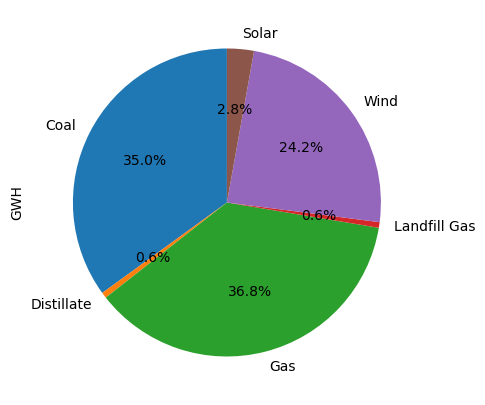

In [11]:
df_for_plot = pd.DataFrame(df_summary.loc[(2020,12)]['GWH']).transpose()
df_for_plot = df_for_plot[['Coal', 'Distillate', 'Gas', 'Landfill Gas',  'Wind','Solar']]
df_for_plot = df_for_plot.transpose()
df_for_plot.transpose()
df_for_plot.plot(kind='pie', subplots=True, autopct='%1.1f%%',  startangle=90, figsize=(5, 5), legend=None)